<a href="https://colab.research.google.com/github/Sydney205/student_performance_analysis/blob/main/student_performance_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Student Performance Analysis**

## Project overview
This project explores factors influencing student academic performance using exploratory data analysis (EDA). The goal is to identify patterns and relationships between study habits, demographics, and GPA

## Key Questions
- How does study time affect GPA?
- Are there performance differences across gender?
- WHich factors show the strongest relationship with GPA?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Sydney205/student_performance_analysis/refs/heads/main/Student_performance_data%20_.csv')
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [3]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


The dataset contains numerical and categorical features related to student demographics, study habits, and academic performance.

In [4]:
df.isnull().sum()

,0
StudentID,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0


In [5]:
df['Gender'] = df['Gender'].astype(int).map({0: "Male", 1: "Female"})
df['GPA'] = df['GPA'].round(2)
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,Female,0,2,19.833723,7,1,2,0,0,1,0,2.93,2.0
1,1002,18,Male,0,1,15.408756,0,0,1,0,0,0,0,3.04,1.0
2,1003,15,Male,2,3,4.210570,26,0,2,0,0,0,0,0.11,4.0
3,1004,17,Female,0,3,10.028829,14,0,3,1,0,0,0,2.05,3.0
4,1005,17,Female,0,2,4.672495,17,1,3,0,0,0,0,1.29,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,Female,0,3,10.680555,2,0,4,1,0,0,0,3.46,0.0
2388,3389,17,Male,0,1,7.583217,4,1,4,0,1,0,0,3.28,4.0
2389,3390,16,Female,0,2,6.805500,20,0,2,0,0,0,1,1.14,2.0
2390,3391,16,Female,1,0,12.416653,17,0,2,0,1,1,0,1.80,1.0


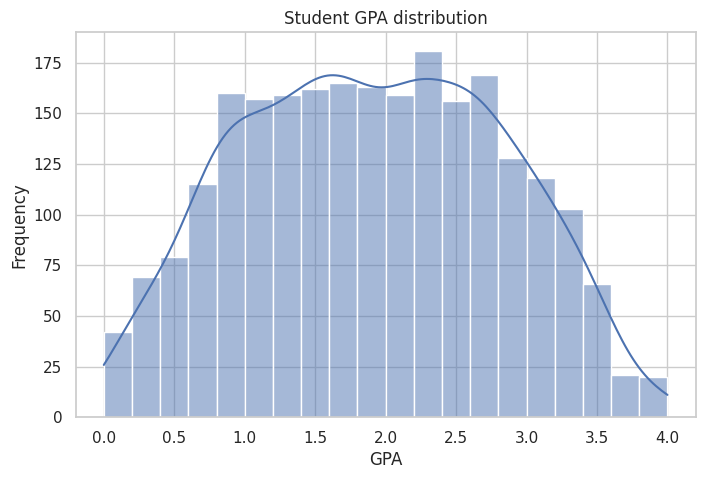

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(df['GPA'], bins=20, kde=True)
plt.title('Student GPA distribution')
plt.xlabel('GPA')
plt.ylabel('Frequency')
# plt.grid(False)
plt.show()

The GPA distribution shows how student performance is spread, highlighting common performance ranges and potentials ouliers.

Text(0.5, 1.0, 'GPA by Gender')

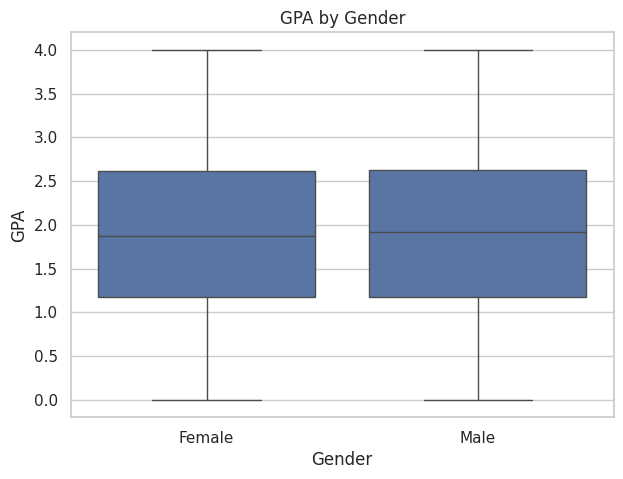

In [10]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Gender', y='GPA', data=df)
plt.title('GPA by Gender')

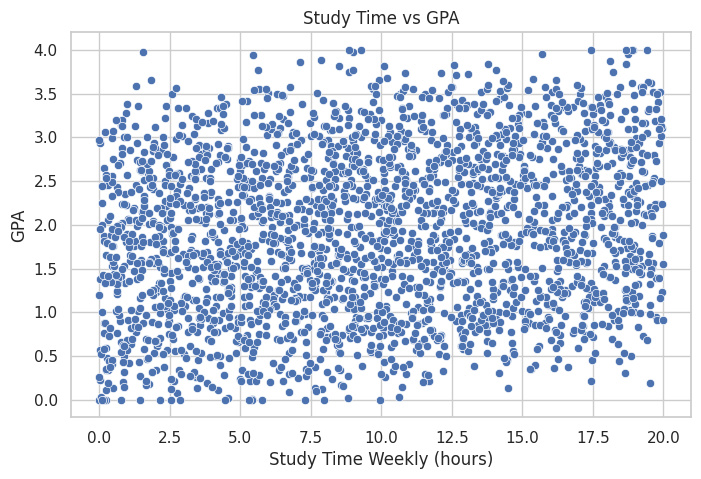

In [11]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='StudyTimeWeekly', y='GPA', data=df)
plt.title('Study Time vs GPA')
plt.xlabel('Study Time Weekly (hours)')
plt.ylabel('GPA')
plt.show()

There is a visible positive relationship between study time and GPA, suggesting that increased study effort contributes to better academic outcomes.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

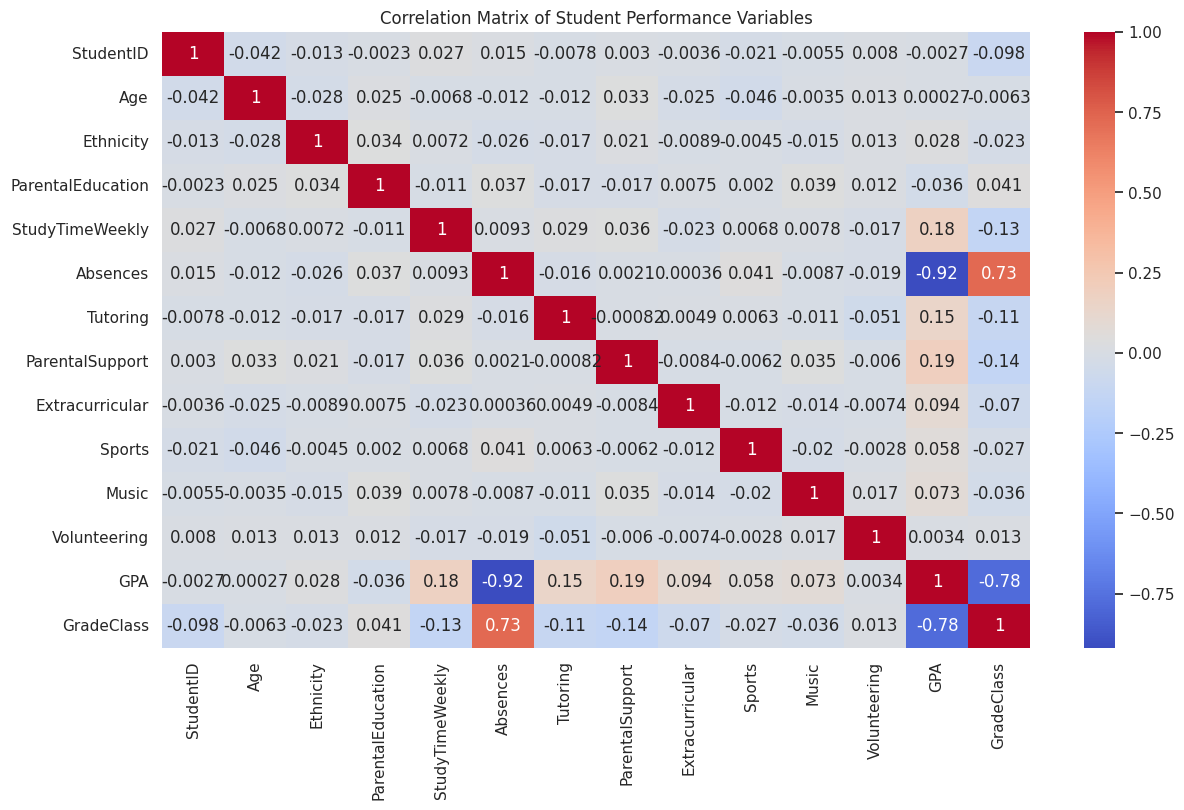

In [17]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Student Performance Variables')
plt

## Key Insights
- Study time shows a positive correlation with GPA.
- GPA distribution suggests a most students perform within an average range
- Gender-based GPA differences exist but are not extreme

## Conclusion & Recommendations
This analysis highlights importance of study habits n academic success. Institutions may improve performance by encouraging structured study routines.

### Future Work
- Include attendance and socio-economic factors
- Apply regression or predictive modelling
- Expand dataset accross institutions